In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/data/oes/"
data = pd.read_csv(base_path + "oes.csv")

In [ ]:
data

,Time(sec),160.646,160.844,161.042,161.241,161.439,161.637,161.836,162.034,162.233,...,1003.34,1003.59,1003.84,1004.09,1004.34,1004.59,1004.84,1005.09,1005.34,1005.59
0,17h12m41s,2846,2821,2850,2878,2871,2812,2897,2937,2951,...,2832,2822,2821,2846,2930,2812,2790,2830,2786,2768
1,17h12m41s,2885,2967,2976,2976,2920,2874,2905,2898,2912,...,2877,2891,2871,2801,2887,2865,2919,2988,2940,2834
2,17h12m41s,2986,2920,2886,2828,2838,2845,2811,2849,2858,...,2837,2847,2831,2759,2802,2839,2897,2852,2819,2794
3,17h12m41s,2963,2937,2941,2900,2826,2903,2901,2944,2950,...,2782,2772,2732,2769,2756,2825,2786,2803,2797,2859
4,17h12m41s,2901,2924,2921,2892,2870,2880,2870,2826,2866,...,2762,2709,2745,2743,2738,2754,2748,2788,2866,2796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,17h14m08s,2846,2927,2880,2881,2841,2919,2924,2948,2928,...,2872,2871,2804,2763,2804,2801,2835,2895,2873,2902
871,17h14m08s,2859,2890,2891,2935,2867,2878,2933,2935,2910,...,2806,2744,2807,2814,2771,2815,2835,2795,2842,2874
872,17h14m08s,2765,2839,2872,2913,2902,2895,2900,2891,2875,...,2855,2863,2783,2740,2820,2858,2886,2846,2844,2859
873,17h14m08s,2865,2911,2961,2902,2943,2941,2829,2900,2890,...,2761,2792,2750,2751,2772,2807,2748,2805,2803,2832


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Columns: 3649 entries, Time(sec) to 1005.59
dtypes: int64(3648), object(1)
memory usage: 24.4+ MB


In [ ]:
data.loc[data.max(axis=1).idxmax()]

Time(sec)    17h13m18s
160.646           2865
160.844           2860
161.042           2849
161.241           2818
               ...    
1004.59           2676
1004.84           2786
1005.09           2784
1005.34           2778
1005.59           2789
Name: 373, Length: 3649, dtype: object

In [ ]:
df = data.transpose()
df = df.reset_index()
df.columns = df.iloc[0]
data1 = df.drop(df.index[0])

In [ ]:
data1.rename(columns={df.columns[0]:'wavenumber'}, inplace=True)
data1 = data1.reset_index(drop=True)
data1

,wavenumber,17h12m41s,17h12m41s,17h12m41s,17h12m41s,17h12m41s,17h12m42s,17h12m42s,17h12m42s,17h12m42s,...,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s
0,160.646,2846,2885,2986,2963,2901,2807,2821,2908,2739,...,2941,2888,2822,2766,2838,2846,2859,2765,2865,2924
1,160.844,2821,2967,2920,2937,2924,2877,2901,2928,2806,...,2935,2923,2880,2806,2932,2927,2890,2839,2911,2930
2,161.042,2850,2976,2886,2941,2921,2833,2922,2878,2856,...,3008,2865,2902,2881,2981,2880,2891,2872,2961,2915
3,161.241,2878,2976,2828,2900,2892,2822,2891,2874,2879,...,2965,2846,2906,2870,2927,2881,2935,2913,2902,2884
4,161.439,2871,2920,2838,2826,2870,2852,2920,2891,2867,...,2955,2791,2902,2923,2884,2841,2867,2902,2943,2910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,1004.59,2812,2865,2839,2825,2754,2846,2834,2766,2807,...,2804,2812,2849,2893,2740,2801,2815,2858,2807,2846
3644,1004.84,2790,2919,2897,2786,2748,2815,2870,2758,2837,...,2837,2821,2792,2901,2776,2835,2835,2886,2748,2843
3645,1005.09,2830,2988,2852,2803,2788,2850,2787,2809,2802,...,2818,2916,2802,2913,2778,2895,2795,2846,2805,2864
3646,1005.34,2786,2940,2819,2797,2866,2761,2828,2837,2863,...,2836,2857,2819,2841,2812,2873,2842,2844,2803,2856


In [ ]:
data = data.iloc[:, 1:].astype(float)

In [ ]:
data1 = data1.astype(float)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Columns: 876 entries, wavenumber to 17h14m08s
dtypes: float64(876)
memory usage: 24.4 MB


In [ ]:
max_value1 = data.values.max()
max_col1 = data.columns[(data == max_value1).any()][0]
max_col1

'314.534'

In [ ]:
max_value = data1.values.max()
max_col = data1.columns[(data1 == max_value).any()][0]
max_col

'17h13m18s'

In [ ]:
data1

,wavenumber,17h12m41s,17h12m41s,17h12m41s,17h12m41s,17h12m41s,17h12m42s,17h12m42s,17h12m42s,17h12m42s,...,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s,17h14m08s
0,160.646,2846.0,2885.0,2986.0,2963.0,2901.0,2807.0,2821.0,2908.0,2739.0,...,2941.0,2888.0,2822.0,2766.0,2838.0,2846.0,2859.0,2765.0,2865.0,2924.0
1,160.844,2821.0,2967.0,2920.0,2937.0,2924.0,2877.0,2901.0,2928.0,2806.0,...,2935.0,2923.0,2880.0,2806.0,2932.0,2927.0,2890.0,2839.0,2911.0,2930.0
2,161.042,2850.0,2976.0,2886.0,2941.0,2921.0,2833.0,2922.0,2878.0,2856.0,...,3008.0,2865.0,2902.0,2881.0,2981.0,2880.0,2891.0,2872.0,2961.0,2915.0
3,161.241,2878.0,2976.0,2828.0,2900.0,2892.0,2822.0,2891.0,2874.0,2879.0,...,2965.0,2846.0,2906.0,2870.0,2927.0,2881.0,2935.0,2913.0,2902.0,2884.0
4,161.439,2871.0,2920.0,2838.0,2826.0,2870.0,2852.0,2920.0,2891.0,2867.0,...,2955.0,2791.0,2902.0,2923.0,2884.0,2841.0,2867.0,2902.0,2943.0,2910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,1004.590,2812.0,2865.0,2839.0,2825.0,2754.0,2846.0,2834.0,2766.0,2807.0,...,2804.0,2812.0,2849.0,2893.0,2740.0,2801.0,2815.0,2858.0,2807.0,2846.0
3644,1004.840,2790.0,2919.0,2897.0,2786.0,2748.0,2815.0,2870.0,2758.0,2837.0,...,2837.0,2821.0,2792.0,2901.0,2776.0,2835.0,2835.0,2886.0,2748.0,2843.0
3645,1005.090,2830.0,2988.0,2852.0,2803.0,2788.0,2850.0,2787.0,2809.0,2802.0,...,2818.0,2916.0,2802.0,2913.0,2778.0,2895.0,2795.0,2846.0,2805.0,2864.0
3646,1005.340,2786.0,2940.0,2819.0,2797.0,2866.0,2761.0,2828.0,2837.0,2863.0,...,2836.0,2857.0,2819.0,2841.0,2812.0,2873.0,2842.0,2844.0,2803.0,2856.0


In [ ]:
data2 = data1[['wavenumber', '17h13m18s']]

In [ ]:
data2

,wavenumber,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s,17h13m18s
0,160.646,2854.0,2810.0,2748.0,2887.0,2872.0,2916.0,2846.0,2798.0,2865.0,2817.0
1,160.844,2870.0,2781.0,2829.0,2887.0,2885.0,2880.0,2900.0,2875.0,2860.0,2823.0
2,161.042,2870.0,2882.0,2872.0,2849.0,2849.0,2915.0,2941.0,2824.0,2849.0,2808.0
3,161.241,2826.0,2955.0,2868.0,2818.0,2834.0,2944.0,2895.0,2888.0,2818.0,2828.0
4,161.439,2803.0,2863.0,2842.0,2816.0,2799.0,2988.0,2981.0,2857.0,2777.0,2692.0
...,...,...,...,...,...,...,...,...,...,...,...
3643,1004.590,2881.0,2874.0,2786.0,2850.0,2815.0,2847.0,2840.0,2726.0,2676.0,2794.0
3644,1004.840,2892.0,2855.0,2819.0,2863.0,2770.0,2799.0,2871.0,2845.0,2786.0,2788.0
3645,1005.090,2876.0,2750.0,2771.0,2854.0,2777.0,2780.0,2914.0,2842.0,2784.0,2822.0
3646,1005.340,2785.0,2786.0,2804.0,2870.0,2786.0,2795.0,2790.0,2794.0,2778.0,2808.0


In [ ]:
data2.iloc[:, 9:10]

,17h13m18s
0,2865.0
1,2860.0
2,2849.0
3,2818.0
4,2777.0
...,...
3643,2676.0
3644,2786.0
3645,2784.0
3646,2778.0


In [ ]:
data2[['wavenumber']]

,wavenumber
0,160.646
1,160.844
2,161.042
3,161.241
4,161.439
...,...
3643,1004.590
3644,1004.840
3645,1005.090
3646,1005.340


In [ ]:
data2 = pd.concat([data2[['wavenumber']], data2.iloc[:, 9:10]], axis=1)
data2

,wavenumber,17h13m18s
0,160.646,2865.0
1,160.844,2860.0
2,161.042,2849.0
3,161.241,2818.0
4,161.439,2777.0
...,...,...
3643,1004.590,2676.0
3644,1004.840,2786.0
3645,1005.090,2784.0
3646,1005.340,2778.0


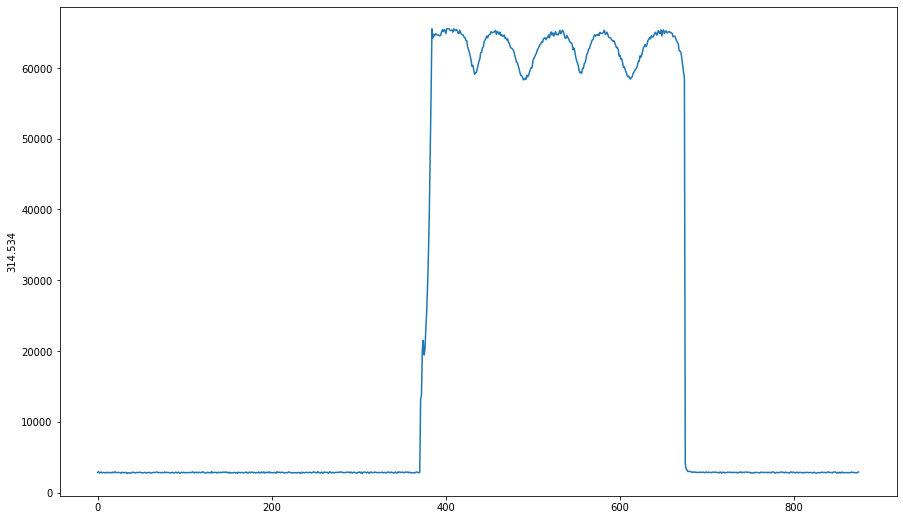

In [ ]:
plt.figure(figsize=(15,9))
# plt.ylim(2500, 70000)
sns.lineplot(y=data['314.534'], x=data.index)

In [ ]:
data1.iloc[:, 1:2]

,17h12m41s
0,2846.0
1,2821.0
2,2850.0
3,2878.0
4,2871.0
...,...
3643,2812.0
3644,2790.0
3645,2830.0
3646,2786.0


In [ ]:
data1.iloc[:, 0:1]

,wavenumber
0,160.646
1,160.844
2,161.042
3,161.241
4,161.439
...,...
3643,1004.590
3644,1004.840
3645,1005.090
3646,1005.340


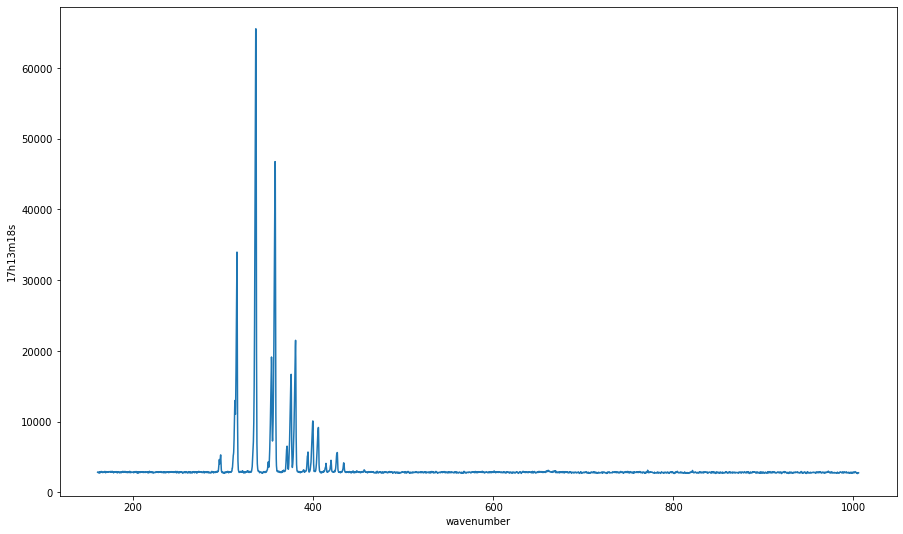

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(y=data2['17h13m18s'], x=data1['wavenumber'])

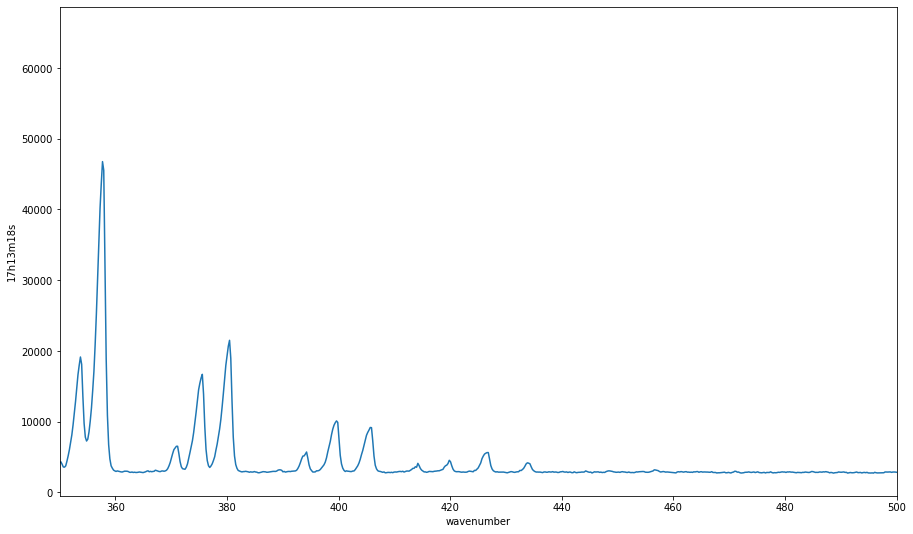

In [ ]:
plt.figure(figsize=(15,9))
plt.xlim(350,500)
sns.lineplot(y=data2['17h13m18s'], x=data1['wavenumber'])

In [ ]:
data1.loc[data1.max(axis=1).idxmax()]

0
wavenumber     314.534
17h12m41s     2852.000
17h12m41s     2945.000
17h12m41s     2770.000
17h12m41s     2836.000
                ...   
17h14m08s     2795.000
17h14m08s     2800.000
17h14m08s     2768.000
17h14m08s     2856.000
17h14m08s     2911.000
Name: 742, Length: 876, dtype: float64

In [ ]:
data.iloc[:, 2615:].head()

,749.348,749.593,749.837,750.082,750.327,750.571,750.816,751.061,751.305,751.55,...,1003.34,1003.59,1003.84,1004.09,1004.34,1004.59,1004.84,1005.09,1005.34,1005.59
0,2782.0,2815.0,2827.0,2819.0,2848.0,2828.0,2818.0,2765.0,2786.0,2754.0,...,2832.0,2822.0,2821.0,2846.0,2930.0,2812.0,2790.0,2830.0,2786.0,2768.0
1,3042.0,2967.0,2979.0,3012.0,3022.0,3042.0,2992.0,2903.0,2871.0,2817.0,...,2877.0,2891.0,2871.0,2801.0,2887.0,2865.0,2919.0,2988.0,2940.0,2834.0
2,2816.0,2781.0,2870.0,2897.0,2855.0,2856.0,2846.0,2826.0,2873.0,2818.0,...,2837.0,2847.0,2831.0,2759.0,2802.0,2839.0,2897.0,2852.0,2819.0,2794.0
3,2826.0,2796.0,2855.0,2883.0,2841.0,2846.0,2879.0,2890.0,2887.0,2886.0,...,2782.0,2772.0,2732.0,2769.0,2756.0,2825.0,2786.0,2803.0,2797.0,2859.0
4,2775.0,2867.0,2914.0,2878.0,2855.0,2846.0,2881.0,2853.0,2864.0,2867.0,...,2762.0,2709.0,2745.0,2743.0,2738.0,2754.0,2748.0,2788.0,2866.0,2796.0


In [ ]:
data.loc[:, ['357.695']].max()

357.695    65535.0
dtype: float64

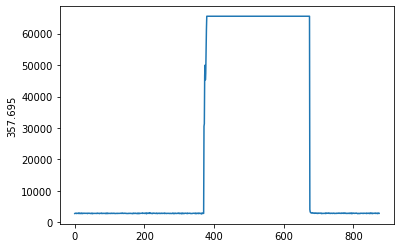

In [ ]:
sns.lineplot(x=data.index, y=data['357.695']) # Nitrogen1

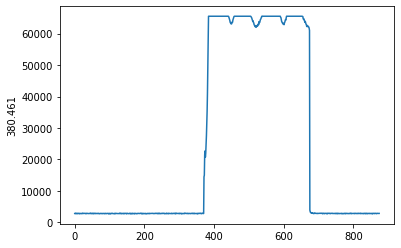

In [ ]:
sns.lineplot(x=data.index, y=data['380.461']) # Nitrogen2

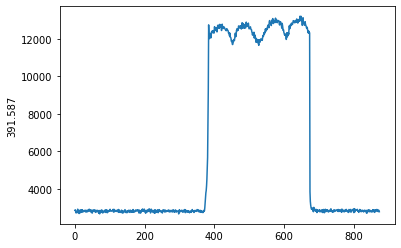

In [ ]:
sns.lineplot(x=data.index, y=data['391.587']) # Nitrogen3

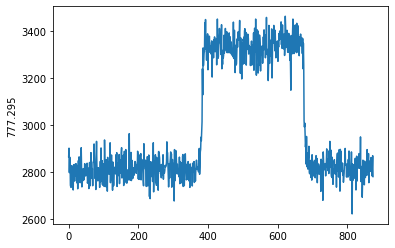

In [ ]:
sns.lineplot(x=data.index, y=data['777.295']) # Oxygen

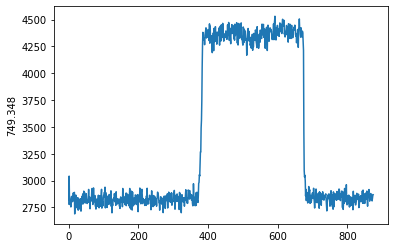

In [ ]:
sns.lineplot(x=data.index, y=data['749.348']) # Argon

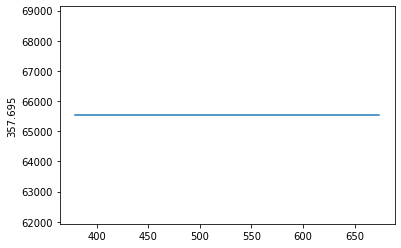

In [ ]:
temp = data[379:675]
sns.lineplot(x=temp.index, y=temp['357.695'])

In [ ]:
temp = temp.reset_index(drop=True)

In [ ]:
data_target = pd.DataFrame(data[['357.695', '380.461', '391.587', '777.295', '749.348', ]])
data_target.rename(columns={data_target.columns[0]:'Nitrogen1(357)', data_target.columns[1]:'Nitrogen2(380)', data_target.columns[2]:'Nitrogen3(391)', data_target.columns[3]:'Oxygen(777)', data_target.columns[4]:'Argon(749)'}, inplace=True)
data_target

,Nitrogen1(357),Nitrogen2(380),Nitrogen3(391),Oxygen(777),Argon(749)
0,2780.0,2829.0,2840.0,2865.0,2782.0
1,2859.0,2923.0,2874.0,2901.0,3042.0
2,2837.0,2762.0,2812.0,2797.0,2816.0
3,2878.0,2802.0,2708.0,2863.0,2826.0
4,2776.0,2885.0,2784.0,2849.0,2775.0
...,...,...,...,...,...
870,2878.0,2807.0,2805.0,2848.0,2866.0
871,2785.0,2808.0,2778.0,2783.0,2811.0
872,2891.0,2817.0,2858.0,2831.0,2839.0
873,2816.0,2830.0,2806.0,2869.0,2861.0


In [ ]:
#점화됐을때 df
data_target1 = pd.DataFrame(temp[['357.695', '380.461', '391.587', '777.295', '749.348', ]])
data_target1.rename(columns={data_target1.columns[0]:'Nitrogen1(357)', data_target1.columns[1]:'Nitrogen2(380)', data_target1.columns[2]:'Nitrogen3(391)', data_target1.columns[3]:'Oxygen(777)', data_target1.columns[4]:'Argon(749)'}, inplace=True)
data_target1

,Nitrogen1(357),Nitrogen2(380),Nitrogen3(391),Oxygen(777),Argon(749)
0,65535.0,30990.0,4521.0,2896.0,3267.0
1,65535.0,35360.0,5088.0,2948.0,3489.0
2,65535.0,41271.0,5672.0,2933.0,3563.0
3,65535.0,49549.0,7367.0,2978.0,3742.0
4,65535.0,58472.0,9296.0,3013.0,4052.0
...,...,...,...,...,...
291,65535.0,62402.0,12328.0,3347.0,4338.0
292,65535.0,62172.0,12438.0,3304.0,4390.0
293,65535.0,62099.0,12318.0,3368.0,4370.0
294,65535.0,61705.0,12362.0,3239.0,4294.0


In [ ]:
threshold = data_target["Nitrogen1(357)"].quantile(0.95)
temp1 = data_target[data_target["Nitrogen1(357)"] < threshold]
temp1

,Nitrogen1(357),Nitrogen2(380),Nitrogen3(391),Oxygen(777),Argon(749)
0,2780.0,2829.0,2840.0,2865.0,2782.0
1,2859.0,2923.0,2874.0,2901.0,3042.0
2,2837.0,2762.0,2812.0,2797.0,2816.0
3,2878.0,2802.0,2708.0,2863.0,2826.0
4,2776.0,2885.0,2784.0,2849.0,2775.0
...,...,...,...,...,...
870,2878.0,2807.0,2805.0,2848.0,2866.0
871,2785.0,2808.0,2778.0,2783.0,2811.0
872,2891.0,2817.0,2858.0,2831.0,2839.0
873,2816.0,2830.0,2806.0,2869.0,2861.0


In [ ]:
#temp1 = data_target.drop(data_target[data_target['Nitrogen1'] > 65000].index, axis=0)
#temp2 = temp1.drop(temp1[temp1['Nitrogen1'] < 10000].index, axis=0)
#temp2

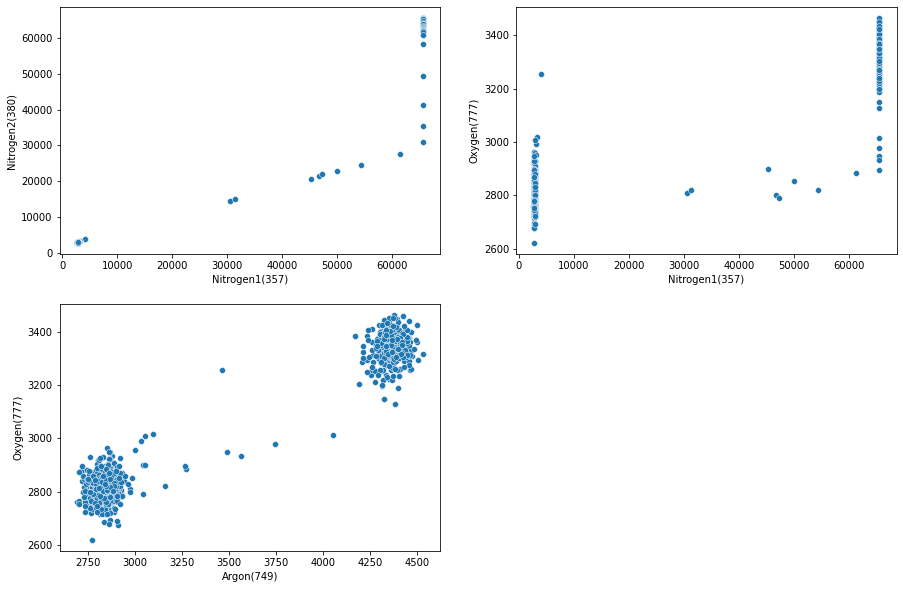

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=data_target['Nitrogen1(357)'], y=data_target['Nitrogen2(380)'])
plt.subplot(2,2,2)
sns.scatterplot(x=data_target['Nitrogen1(357)'], y=data_target['Oxygen(777)'])
plt.subplot(2,2,3)
sns.scatterplot(y=data_target['Oxygen(777)'], x=data_target['Argon(749)'])

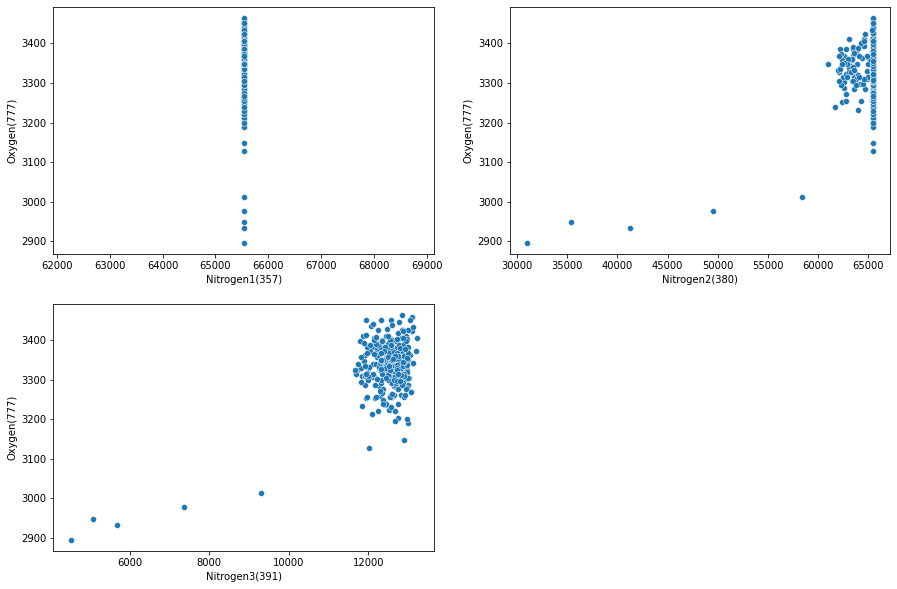

In [ ]:
#활성구간 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=data_target1['Nitrogen1(357)'], y=data_target1['Oxygen(777)'])
plt.subplot(2,2,2)
sns.scatterplot(x=data_target1['Nitrogen2(380)'], y=data_target1['Oxygen(777)'])
plt.subplot(2,2,3)
sns.scatterplot(x=data_target1['Nitrogen3(391)'], y=data_target1['Oxygen(777)'])

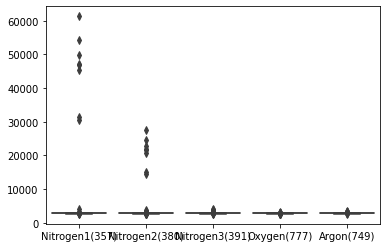

In [ ]:
sns.boxplot(data=temp1)

In [ ]:
y = data_target['Oxygen(777)']
X = data_target.drop(columns='Oxygen(777)')
X

,Nitrogen1(357),Nitrogen2(380),Nitrogen3(391),Argon(749)
0,2780.0,2829.0,2840.0,2782.0
1,2859.0,2923.0,2874.0,3042.0
2,2837.0,2762.0,2812.0,2816.0
3,2878.0,2802.0,2708.0,2826.0
4,2776.0,2885.0,2784.0,2775.0
...,...,...,...,...
870,2878.0,2807.0,2805.0,2866.0
871,2785.0,2808.0,2778.0,2811.0
872,2891.0,2817.0,2858.0,2839.0
873,2816.0,2830.0,2806.0,2861.0


In [ ]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #9:1

(787, 4) (88, 4) (787,) (88,)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def train(model, X_train,  y_train, X_test):
  model.fit(X_train, y_train)
  pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, pred_train)
  r2_train = r2_score(y_train, pred_train)
  pred_test = model.predict(X_test)
  mse_test = mean_squared_error(y_test, pred_test)
  r2_test = r2_score(y_test, pred_test)
  return mse_train, mse_test, r2_train, r2_test

train(LGBMRegressor(), X_train,  y_train, X_test)

(933.1521889982613, 9238.968137885902, 0.9851433483997841, 0.8462834197727334)

In [ ]:
model.fit(X_train, y_train)
test_result = model.predict(X_test)

In [ ]:
test_result

array([2963.39568023, 2913.34063358, 3005.7322287 , 2910.79687816,
       3336.20279888, 2910.58458999, 2902.2216604 , 2909.69033307,
       2923.9698502 , 2913.62951102, 2893.34852829, 2938.99465655,
       3346.24525263, 2910.79687816, 2913.62951102, 3353.87246736,
       2938.99465655, 3349.2181403 , 3370.28451299, 2913.62951102,
       2909.23176671, 3314.59977677, 3360.68867641, 2912.14619367,
       2940.40584532, 3345.88381195, 2900.73834306, 2912.28019551,
       3310.81382348, 2938.99465655, 2913.34063358, 2910.79687816,
       2910.58458999, 2900.03710161, 3349.2181403 , 2912.41540672,
       2912.28019551, 2902.2216604 , 2897.70782782, 2894.4511134 ,
       3352.2201334 , 3357.14674486, 2911.85731624, 2910.79687816,
       3390.97931163, 3353.87246736, 2910.79687816, 2913.34063358,
       3342.13469525, 2894.4511134 , 2912.41540672, 2910.77207118,
       2912.14619367, 2910.58458999, 2912.28019551, 2900.73834306,
       3389.33301249, 2913.62951102, 2912.41540672, 2907.33649

In [ ]:
r2_test = r2_score(y_test, test_result)
r2_test

0.8462834197727334

In [ ]:
pred = pd.DataFrame(test_result, columns=["pred"])

In [ ]:
y_test.reset_index(drop=True, inplace=True)
y_test
result_df = pd.concat([y_test, pred], axis=1)
result_df

,Oxygen(777),pred
0,2829.0,2963.395680
1,2750.0,2913.340634
2,2978.0,3005.732229
3,2776.0,2910.796878
4,3313.0,3336.202799
...,...,...
83,3311.0,3353.872467
84,2799.0,2902.221660
85,3324.0,3353.872467
86,3284.0,3302.524591


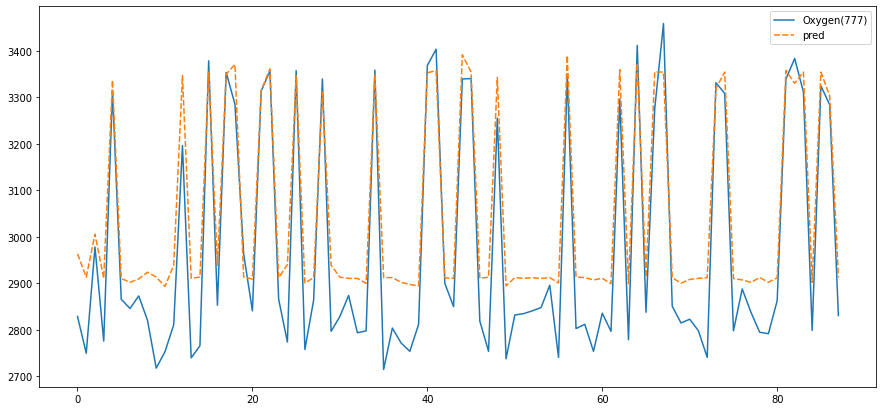

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=result_df, legend=True)
plt.savefig("oxygen_pred.png")